In [ ]:
import os
import zipfile
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths (MODIFY THESE TO MATCH YOUR ACTUAL FILE PATHS)
drive_root = '/content/drive/MyDrive/'  # Adjust if your files are in a subfolder
train_zip_path = os.path.join(drive_root, 'training_set.zip')
train_csv_path = os.path.join(drive_root, 'training_set_pixel_size_and_HC.csv')

# Verify files exist
print("Checking if files exist...")
print(f"Train zip exists: {os.path.exists(train_zip_path)}")
print(f"Train CSV exists: {os.path.exists(train_csv_path)}")

# Create directories
base_dir = '/content/data'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
train_images_dir = os.path.join(train_dir, 'images')
train_masks_dir = os.path.join(train_dir, 'masks')

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_masks_dir, exist_ok=True)

# Extract training data
print("\nExtracting training data...")
try:
    with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
        zip_ref.extractall(train_dir)
    print("Training data extracted successfully!")
    print("Contents of train directory:")
    print(os.listdir(train_dir))
except Exception as e:
    print(f"Error extracting training data: {e}")

# Load CSV file
print("\nLoading CSV file...")
try:
    train_csv = pd.read_csv(train_csv_path)
    print("Training CSV loaded successfully!")
    print(f"Found {len(train_csv)} entries in training CSV")
except Exception as e:
    print(f"Error loading training CSV: {e}")
    train_csv = None

# Organize files with more robust checking
print("\nOrganizing files...")

def find_files(directory, pattern):
    """Find all files in directory matching pattern"""
    matches = []
    for root, _, files in os.walk(directory):
        for f in files:
            if f.endswith(pattern):
                matches.append(os.path.join(root, f))
    return matches

# Find all PNGs in train directory
train_pngs = find_files(train_dir, '.png')
print(f"Found {len(train_pngs)} PNG files in train directory")

# Move files to appropriate folders
moved_images = 0
moved_masks = 0

for filepath in train_pngs:
    filename = os.path.basename(filepath)
    try:
        if '_Annotation' in filename:
            new_path = os.path.join(train_masks_dir, filename)
            os.rename(filepath, new_path)
            moved_masks += 1
        else:
            new_path = os.path.join(train_images_dir, filename)
            os.rename(filepath, new_path)
            moved_images += 1
    except Exception as e:
        print(f"Error moving {filename}: {e}")

print(f"Moved {moved_images} images to {train_images_dir}")
print(f"Moved {moved_masks} masks to {train_masks_dir}")

# Final verification
print("\nFinal verification:")
print(f"Training images: {len(os.listdir(train_images_dir))}")
print(f"Training masks: {len(os.listdir(train_masks_dir))}")

if train_csv is not None:
    print("\nSample training CSV data:")
    print(train_csv.head())


Mounted at /content/drive
Checking if files exist...
Train zip exists: True
Train CSV exists: True

Extracting training data...
Training data extracted successfully!
Contents of train directory:
['images', 'training_set', 'masks']

Loading CSV file...
Training CSV loaded successfully!
Found 999 entries in training CSV

Organizing files...
Found 1998 PNG files in train directory
Moved 999 images to /content/data/train/images
Moved 999 masks to /content/data/train/masks

Final verification:
Training images: 999
Training masks: 999

Sample training CSV data:
   filename  pixel size  head circumference (mm)
0  1_HC.png    0.069136                    44.30
1  2_HC.png    0.089659                    56.81
2  3_HC.png    0.062033                    68.75
3  4_HC.png    0.091291                    69.00
4  5_HC.png    0.061240                    59.81


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00
Found 999 images and 999 masks

Sample 1:
Image: 100_2HC.png
Mask: 100_2HC_Annotation.png


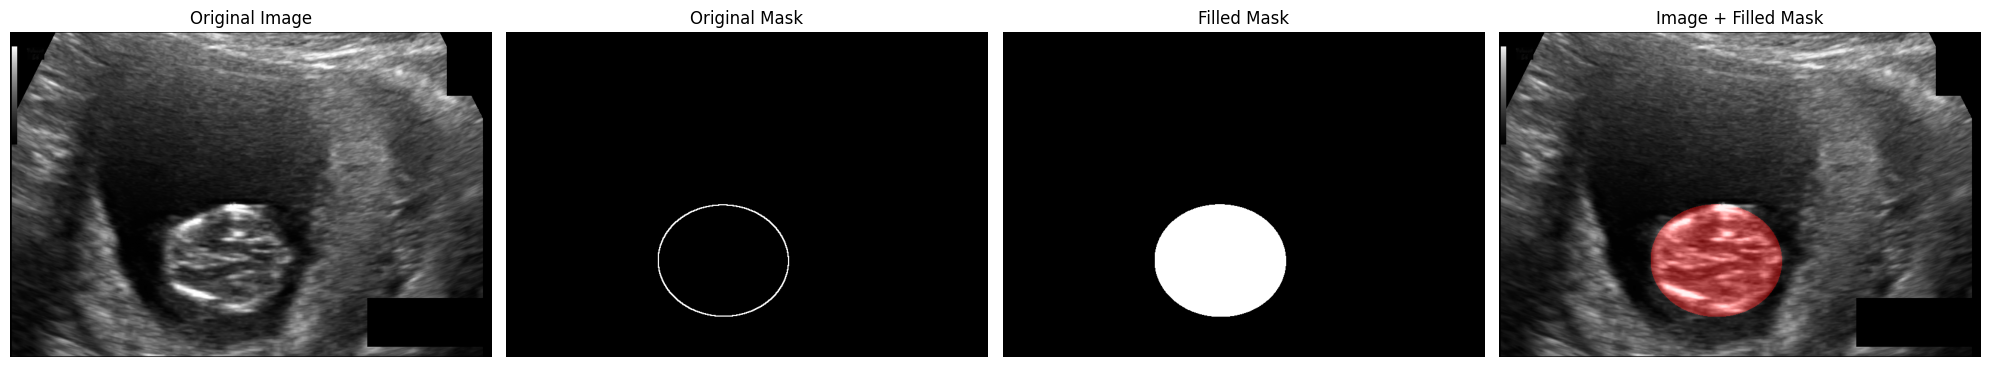


Sample 2:
Image: 101_HC.png
Mask: 101_HC_Annotation.png


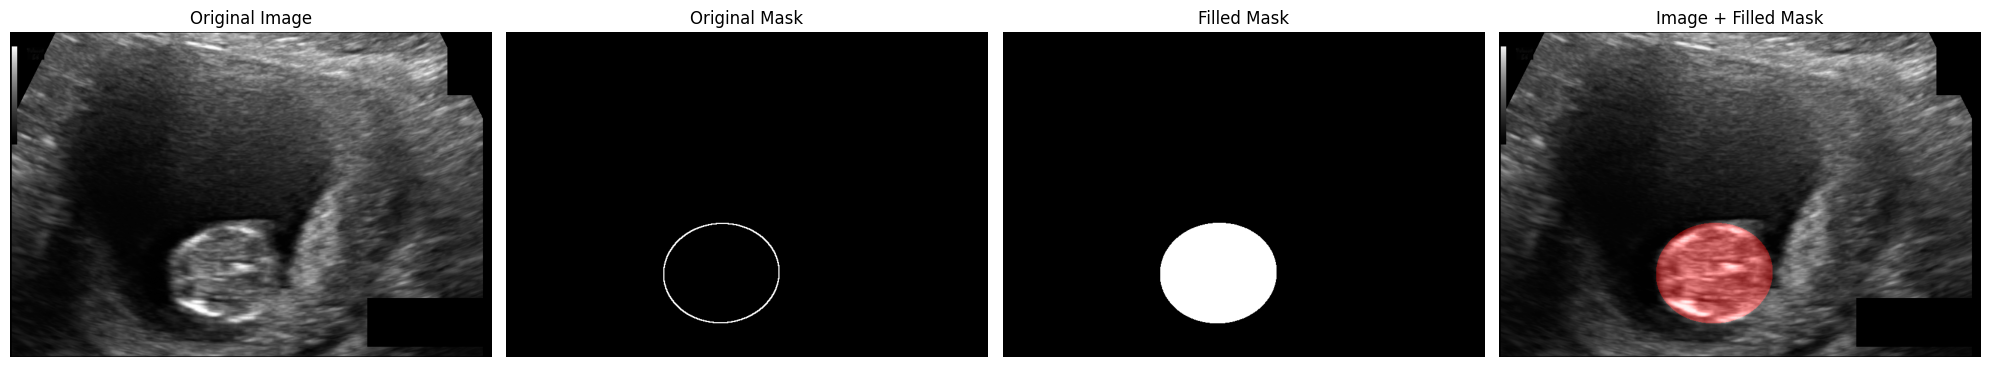


Sample 3:
Image: 102_2HC.png
Mask: 102_2HC_Annotation.png


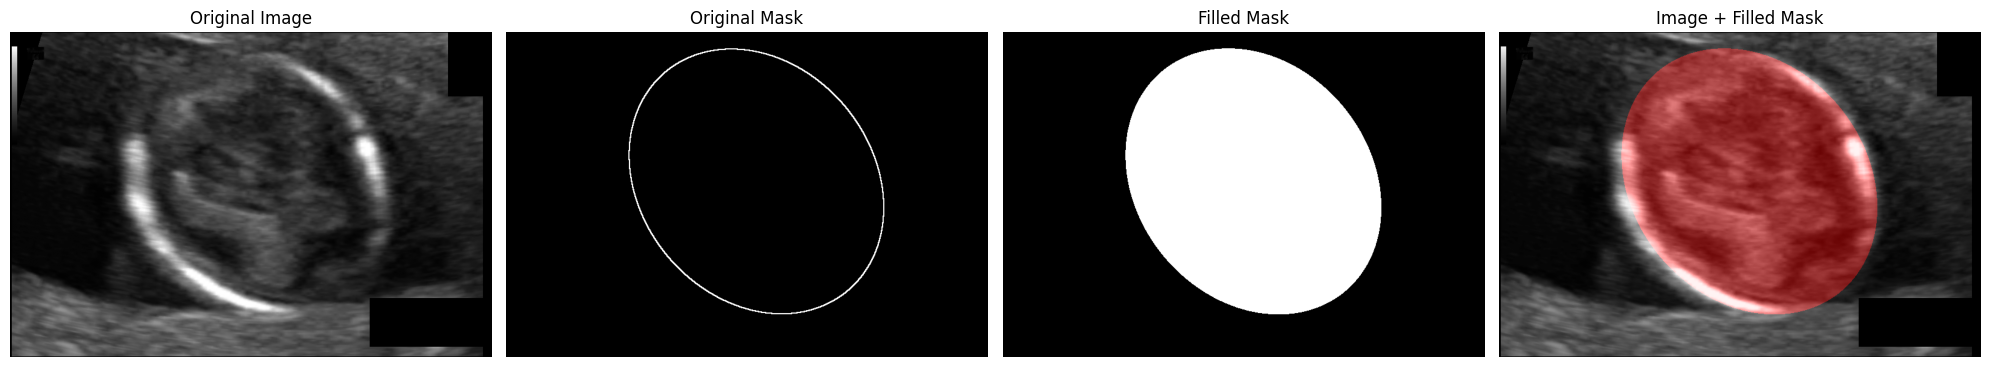

In [ ]:
!pip install opencv-python-headless --quiet
!pip install segmentation-models-pytorch --quiet
!pip install albumentations --quiet


import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob

# Set paths (modify if needed)
train_images_dir = '/content/data/train/images'
train_masks_dir = '/content/data/train/masks'

# Get sample images and masks
image_files = sorted(glob(os.path.join(train_images_dir, '*.png')))
mask_files = sorted(glob(os.path.join(train_masks_dir, '*_Annotation.png')))

# Verify we have matching pairs
if len(image_files) == 0 or len(mask_files) == 0:
    print("No images or masks found! Check your paths:")
    print(f"Images path: {train_images_dir}")
    print(f"Masks path: {train_masks_dir}")
else:
    print(f"Found {len(image_files)} images and {len(mask_files)} masks")

# Function to fill holes in a binary mask
def fill_holes(mask):
    """Fill holes in a binary mask using morphological closing and contour filling."""
    # Ensure mask is binary (0 or 255)
    _, binary_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

    # Find contours and fill them
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filled_mask = np.zeros_like(binary_mask)
    cv2.drawContours(filled_mask, contours, -1, 255, thickness=cv2.FILLED)

    # Alternatively, use morphological closing (kernel size may need adjustment)
    # kernel = np.ones((5, 5), np.uint8)
    # filled_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

    return filled_mask

# Display function (now includes hole-filling)
def display_image_with_mask(image_path, mask_path, alpha=0.4):
    """Display image with mask overlay (after filling holes in the mask)."""
    # Read images
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or mask is None:
        print(f"Could not read {image_path} or {mask_path}")
        return

    # Fill holes in the mask
    filled_mask = fill_holes(mask)

    # Create colored mask (red in this case)
    colored_mask = np.zeros((*filled_mask.shape, 3), dtype=np.uint8)
    colored_mask[filled_mask > 0] = [255, 0, 0]  # Red color

    # Convert grayscale image to RGB for visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Overlay mask
    overlayed = cv2.addWeighted(image_rgb, 1, colored_mask, alpha, 0)

    # Create figure
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Now with 4 subplots

    # Display original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display original mask (before filling holes)
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Original Mask')
    axes[1].axis('off')

    # Display filled mask (after processing)
    axes[2].imshow(filled_mask, cmap='gray')
    axes[2].set_title('Filled Mask')
    axes[2].axis('off')

    # Display overlay
    axes[3].imshow(overlayed)
    axes[3].set_title('Image + Filled Mask')
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()

# Display first few samples
num_samples = min(3, len(image_files))
for i in range(num_samples):
    print(f"\nSample {i+1}:")
    print(f"Image: {os.path.basename(image_files[i])}")
    print(f"Mask: {os.path.basename(mask_files[i])}")
    display_image_with_mask(image_files[i], mask_files[i])

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from skimage import exposure
import albumentations as A
from sklearn.model_selection import train_test_split
from collections import defaultdict
import matplotlib.pyplot as plt
from glob import glob

# Configuration for 256x256 images
class Config:
    TARGET_SIZE = (256, 256)
    INPUT_IMAGES_DIR = '/content/data/train/images'
    INPUT_MASKS_DIR = '/content/data/train/masks'
    OUTPUT_DIR = '/content/data/split_preprocessed_256'

    AUGMENT = True
    NUM_AUGMENTATIONS = 5
    TEST_SIZE = 0.2
    VAL_SIZE = 0.2
    RANDOM_STATE = 42

# Create output directories
for subset in ['train', 'val', 'test']:
    for data_type in ['images', 'masks']:
        os.makedirs(os.path.join(Config.OUTPUT_DIR, subset, data_type), exist_ok=True)

class DataPreprocessor:
    def __init__(self):
        self.class_stats = defaultdict(list)
        self.augmentation_pipeline = self._create_augmentation_pipeline()

    def _create_augmentation_pipeline(self):
        """Create augmentation pipeline with foreground preservation"""
        return A.Compose([
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.Rotate(limit=30, p=0.5, interpolation=cv2.INTER_NEAREST),
            A.ShiftScaleRotate(
                shift_limit=0.05,
                scale_limit=0.1,
                rotate_limit=20,
                p=0.5,
                interpolation=cv2.INTER_NEAREST
            ),
            A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.3),
            A.CLAHE(clip_limit=3.0, p=0.3),
            A.GaussNoise(var_limit=5.0, p=0.1),
            A.OneOf([
                A.ElasticTransform(alpha=0.3, sigma=15, alpha_affine=8, p=0.2, interpolation=cv2.INTER_NEAREST),
                A.GridDistortion(num_steps=2, distort_limit=0.08, p=0.2, interpolation=cv2.INTER_NEAREST),
            ], p=0.3),
        ], additional_targets={'mask': 'mask'})

    def _fill_holes(self, mask):
        """Fill holes in a binary mask using contour filling."""
        _, binary_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        filled_mask = np.zeros_like(binary_mask)
        cv2.drawContours(filled_mask, contours, -1, 255, thickness=cv2.FILLED)
        return filled_mask

    def _enhance_foreground(self, image, mask):
        """Apply techniques to enhance visibility of rare foreground."""
        if np.mean(mask) < 0.01:
            fg_pixels = image[mask > 0]
            if len(fg_pixels) > 5:
                p2, p98 = np.percentile(fg_pixels, (2, 98))
                if p98 - p2 > 3:
                    image = exposure.rescale_intensity(image, in_range=(p2, p98), out_range=(0, 255)).astype(np.uint8)
            gamma = np.clip(0.6 + np.random.rand()*0.3, 0.6, 0.9)
            image = exposure.adjust_gamma(image, gamma=gamma)
            if np.random.rand() > 0.7:
                kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]]) / 10.0
                fg_regions = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))
                sharpened = cv2.filter2D(fg_regions, -1, kernel)
                image = cv2.addWeighted(image, 0.85, sharpened, 0.15, 0)
                image = np.clip(image, 0, 255)
        return image, mask

    def process_dataset(self):
        """Process and split the dataset."""
        image_files = sorted(glob(os.path.join(Config.INPUT_IMAGES_DIR, '*.png')))
        mask_files = sorted(glob(os.path.join(Config.INPUT_MASKS_DIR, '*.png')))

        data_pairs = list(zip(image_files, mask_files))
        train_pairs, test_pairs = train_test_split(data_pairs, test_size=Config.TEST_SIZE, random_state=Config.RANDOM_STATE)
        train_pairs, val_pairs = train_test_split(train_pairs, test_size=Config.VAL_SIZE / (1 - Config.TEST_SIZE), random_state=Config.RANDOM_STATE)

        self._process_subset(train_pairs, 'train')
        self._process_subset(val_pairs, 'val')
        self._process_subset(test_pairs, 'test')

    def _process_subset(self, pairs, subset):
        """Process and save a subset (train, val, or test)."""
        for image_path, mask_path in tqdm(pairs, desc=f"Processing {subset}"):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            # Fill holes in the mask before processing
            mask = self._fill_holes(mask)

            # Resize to target size
            image = cv2.resize(image, Config.TARGET_SIZE, interpolation=cv2.INTER_AREA)
            mask = cv2.resize(mask, Config.TARGET_SIZE, interpolation=cv2.INTER_NEAREST)

            # Enhance foreground (if enabled)
            image, mask = self._enhance_foreground(image, mask)

            # Data augmentation (if enabled)
            if Config.AUGMENT and subset == 'train':
                for i in range(Config.NUM_AUGMENTATIONS):
                    augmented = self.augmentation_pipeline(image=image, mask=mask)
                    self._save_image_mask_pair(augmented['image'], augmented['mask'], subset, image_path, mask_path, is_augmented=True)

            # Save original (and augmented if applicable) image and mask
            self._save_image_mask_pair(image, mask, subset, image_path, mask_path)

    def _save_image_mask_pair(self, image, mask, subset, image_path, mask_path, is_augmented=False):
        """Save image and mask to the appropriate directory."""
        filename_base = os.path.splitext(os.path.basename(image_path))[0]
        if is_augmented:
            filename_base += f"_aug_{i}"

        image_output_path = os.path.join(Config.OUTPUT_DIR, subset, 'images', f"{filename_base}.png")
        mask_output_path = os.path.join(Config.OUTPUT_DIR, subset, 'masks', f"{filename_base}.png")

        cv2.imwrite(image_output_path, image)
        cv2.imwrite(mask_output_path, mask)

if __name__ == "__main__":
    preprocessor = DataPreprocessor()
    preprocessor.process_dataset()

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipython-input-3-2142060390.py:50: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=5.0, p=0.1),
/tmp/ipython-input-3-2142060390.py:52: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=0.3, sigma=15, alpha_affine=8, p=0.2, interpolation=cv2.INTER_NEAREST),
Processing test: 100%|██████████| 200/200 [00:02<00:00, 82.20it/s]


In [ ]:
!pip install segmentation-models-pytorch --quiet
!pip install albumentations --quiet


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
import math

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path configuration
data_path = "/content/data/split_preprocessed_256"
model_save_path = "/content/drive/MyDrive/best_ducknet_model.pth"

# Dataset implementation
class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = A.Compose([
            A.Resize(256, 256),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomRotate90(p=0.5),
            A.Normalize(mean=(0.5,), std=(0.5,)),
            ToTensorV2()
        ])
        self._validate_data()

    def _fill_holes(self, mask):
        mask = (mask > 127).astype(np.uint8) * 255
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        filled = np.zeros_like(mask)
        cv2.drawContours(filled, contours, -1, 255, thickness=cv2.FILLED)
        return filled

    def _validate_data(self):
        for img_path, mask_path in zip(self.image_paths, self.mask_paths):
            if not (os.path.exists(img_path) and os.path.exists(mask_path)):
                raise FileNotFoundError(f"Missing file: {img_path} or {mask_path}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = cv2.imread(self.image_paths[idx], cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)
        mask = self._fill_holes(mask)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)

        transformed = self.transform(image=image, mask=mask)
        image = transformed["image"].float()
        mask = transformed["mask"].float().unsqueeze(0) / 255.0

        return image, mask

def get_data_loaders(batch_size=4):
    splits = ["train", "val", "test"]
    loaders = {}

    for split in splits:
        image_dir = os.path.join(data_path, split, "images")
        mask_dir = os.path.join(data_path, split, "masks")

        image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')])
        mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.png')])

        assert len(image_paths) == len(mask_paths), f"Mismatched image/mask count in {split}"

        dataset = SegmentationDataset(image_paths, mask_paths)
        loaders[split] = DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=(split == "train"),
            num_workers=4,
            pin_memory=True
        )

    return loaders['train'], loaders['val'], loaders['test']

# DUCKNet Implementation
class DUCKBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DUCKBlock, self).__init__()
        self.conv1x1 = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.conv3x3 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv5x5 = nn.Conv2d(in_channels, out_channels, kernel_size=5, padding=2)
        self.conv7x7 = nn.Conv2d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm2d(out_channels * 4)
        self.relu = nn.ReLU(inplace=True)
        self.fuse = nn.Conv2d(out_channels * 4, out_channels, kernel_size=1)

    def forward(self, x):
        c1 = self.conv1x1(x)
        c3 = self.conv3x3(x)
        c5 = self.conv5x5(x)
        c7 = self.conv7x7(x)
        concat = torch.cat([c1, c3, c5, c7], dim=1)
        out = self.bn(concat)
        out = self.relu(out)
        out = self.fuse(out)
        return out

class DownBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownBlock, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv = DUCKBlock(in_channels, out_channels)
        self.residual = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=2)

    def forward(self, x):
        pooled = self.pool(x)
        out = self.conv(pooled)
        res = self.residual(x)
        return out + res

class UpBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpBlock, self).__init__()
        # The transposed convolution takes in_channels and outputs out_channels
        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
        # The DUCKBlock takes the concatenated features: out_channels from transposed conv + skip connection channels
        # The skip connection comes from the encoder block with 'out_channels' of the previous DownBlock
        self.conv = DUCKBlock(out_channels + out_channels, out_channels)

    def forward(self, x, skip):
        x = self.up(x)
        # Handle potential size mismatches
        diffY = skip.size()[2] - x.size()[2]
        diffX = skip.size()[3] - x.size()[3]
        x = F.pad(x, [diffX // 2, diffX - diffX // 2,
                      diffY // 2, diffY - diffY // 2])
        x = torch.cat([x, skip], dim=1)
        return self.conv(x)

class DUCKNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1, features=[32, 64, 128, 256]):
        super(DUCKNet, self).__init__()

        # Encoder
        self.initial = DUCKBlock(in_channels, features[0])
        self.encoder_blocks = nn.ModuleList()
        for i in range(len(features) - 1):
            self.encoder_blocks.append(DownBlock(features[i], features[i+1]))

        # Bottleneck
        self.bottleneck = DUCKBlock(features[-1], features[-1]*2)

        # Decoder
        self.up_blocks = nn.ModuleList()
        rev_features = features[::-1]
        # Correct the input and output channels for the UpBlocks
        for i in range(len(features)):
            # Input channels to transposed conv: features[-1]*2 for the first up_block, then rev_features[i-1]
            # Output channels of transposed conv (and also the skip connection channels): rev_features[i]
            in_ch_up = features[-1]*2 if i == 0 else features[::-1][i-1]
            out_ch_up = features[::-1][i]
            self.up_blocks.append(UpBlock(in_channels=in_ch_up, out_channels=out_ch_up))


        # Final output
        self.final = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def forward(self, x):
        skips = []

        # Encoder
        x = self.initial(x)
        skips.append(x) # skip 0

        for block in self.encoder_blocks:
            x = block(x)
            skips.append(x) # skip 1, 2, 3

        # Bottleneck
        x = self.bottleneck(x) # This output is passed to the first UpBlock

        # Decoder
        # up_blocks iterate through rev_features, which are [256, 128, 64, 32]
        # For the first up_block (i=0, rev_features[0]=256), input is bottleneck (features[-1]*2=512), skip is skips[-1] (256)
        # For the second up_block (i=1, rev_features[1]=128), input is output of first up_block (256), skip is skips[-2] (128)
        # For the third up_block (i=2, rev_features[2]=64), input is output of second up_block (128), skip is skips[-3] (64)
        # For the fourth up_block (i=3, rev_features[3]=32), input is output of third up_block (64), skip is skips[-4] (32)
        decoder_features = features[::-1] # [256, 128, 64, 32]
        for i, out_ch_up in enumerate(decoder_features):
            skip_index = -(i + 1) # skips[-1], skips[-2], skips[-3], skips[-4]
            skip_connection = skips[skip_index]

            # The input channels to the UpBlock's transposed conv is the output channels of the previous layer (bottleneck or previous UpBlock)
            # The output channels of the UpBlock's transposed conv should match the skip connection channels
            # The UpBlock's DUCKBlock then receives the concatenated tensor with (out_ch_up + skip_connection.size(1)) channels
            x = self.up_blocks[i](x, skip_connection)


        return self.final(x)

# Loss and Metrics
class DiceBCELoss(nn.Module):
    def __init__(self, bce_weight=0.3):
        super().__init__()
        self.bce_weight = bce_weight

    def forward(self, pred, target):
        bce = F.binary_cross_entropy_with_logits(pred, target)

        pred = torch.sigmoid(pred)
        intersection = (pred * target).sum()
        dice = 1 - (2. * intersection + 1.) / (pred.sum() + target.sum() + 1.)

        return self.bce_weight * bce + (1 - self.bce_weight) * dice

def calculate_metrics(pred, target):
    pred = (torch.sigmoid(pred) > 0.5).float()
    target = target.float()

    intersection = (pred * target).sum()
    union = pred.sum() + target.sum()

    dice = (2. * intersection) / (union + 1e-8)
    iou = intersection / (union - intersection + 1e-8)
    acc = (pred == target).float().mean()

    return dice.item(), iou.item(), acc.item()

# Training Function
def train_model(model, train_loader, val_loader, epochs=100):
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)
    criterion = DiceBCELoss(bce_weight=0.3)

    best_dice = 0
    history = {
        'train_loss': [], 'train_dice': [], 'train_iou': [], 'train_acc': [],
        'val_dice': [], 'val_iou': [], 'val_acc': []
    }

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        epoch_dice = 0
        epoch_iou = 0
        epoch_acc = 0

        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        for images, masks in pbar:
            images, masks = images.to(device), masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            dice, iou, acc = calculate_metrics(outputs, masks)

            epoch_loss += loss.item()
            epoch_dice += dice
            epoch_iou += iou
            epoch_acc += acc

            pbar.set_postfix({
                'loss': f"{loss.item():.4f}",
                'dice': f"{dice:.4f}"
            })

        # Validation
        model.eval()
        val_dice = 0
        val_iou = 0
        val_acc = 0

        with torch.no_grad():
            for images, masks in val_loader:
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)

                dice, iou, acc = calculate_metrics(outputs, masks)
                val_dice += dice
                val_iou += iou
                val_acc += acc

        # Calculate epoch metrics
        train_loss = epoch_loss / len(train_loader)
        train_dice = epoch_dice / len(train_loader)
        train_iou = epoch_iou / len(train_loader)
        train_acc = epoch_acc / len(train_loader)

        val_dice /= len(val_loader)
        val_iou /= len(val_loader)
        val_acc /= len(val_loader)

        # Update history
        history['train_loss'].append(train_loss)
        history['train_dice'].append(train_dice)
        history['train_iou'].append(train_iou)
        history['train_acc'].append(train_acc)
        history['val_dice'].append(val_dice)
        history['val_iou'].append(val_iou)
        history['val_acc'].append(val_acc)

        # Update scheduler
        scheduler.step(val_dice)

        # Print epoch summary
        print(f"\nEpoch {epoch+1} Summary:")
        print(f"Train Loss: {train_loss:.4f} | Dice: {train_dice:.4f} | IoU: {train_iou:.4f} | Acc: {train_acc:.4f}")
        print(f"Val Dice: {val_dice:.4f} | IoU: {val_iou:.4f} | Acc: {val_acc:.4f}")
        print(f"LR: {optimizer.param_groups[0]['lr']:.2e}")

        # Save best model
        if val_dice > best_dice:
            best_dice = val_dice
            torch.save(model.state_dict(), model_save_path)
            print(f"💾 Saved best model with Dice: {best_dice:.4f}")

    return history

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    dice_scores = []
    iou_scores = []
    acc_scores = []

    with torch.no_grad():
        for images, masks in tqdm(test_loader, desc="Evaluating"):
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)

            dice, iou, acc = calculate_metrics(outputs, masks)
            dice_scores.append(dice)
            iou_scores.append(iou)
            acc_scores.append(acc)

    mean_dice = np.mean(dice_scores)
    mean_iou = np.mean(iou_scores)
    mean_acc = np.mean(acc_scores)

    print(f"\nTest Metrics:")
    print(f"Dice: {mean_dice:.4f} ± {np.std(dice_scores):.4f}")
    print(f"IoU: {mean_iou:.4f} ± {np.std(iou_scores):.4f}")
    print(f"Accuracy: {mean_acc:.4f} ± {np.std(acc_scores):.4f}")

    return mean_dice, mean_iou, mean_acc

# Plotting Function
def plot_training_history(history, test_metrics):
    plt.figure(figsize=(18, 6))

    # Loss plot
    plt.subplot(1, 3, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Dice plot
    plt.subplot(1, 3, 2)
    plt.plot(history['train_dice'], label='Train Dice')
    plt.plot(history['val_dice'], label='Val Dice')
    plt.axhline(test_metrics[0], color='r', linestyle='--', label='Test Dice')
    plt.title('Dice Coefficient')
    plt.xlabel('Epoch')
    plt.ylabel('Dice')
    plt.legend()
    plt.grid()

    # IoU plot
    plt.subplot(1, 3, 3)
    plt.plot(history['train_iou'], label='Train IoU')
    plt.plot(history['val_iou'], label='Val IoU')
    plt.axhline(test_metrics[1], color='r', linestyle='--', label='Test IoU')
    plt.title('IoU Score')
    plt.xlabel('Epoch')
    plt.ylabel('IoU')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Get data loaders
    train_loader, val_loader, test_loader = get_data_loaders(batch_size=4)

    # Initialize DUCKNet model
    # Define the DUCKNet class here to ensure the corrected UpBlock is used
    class DUCKNet(nn.Module):
        def __init__(self, in_channels=1, out_channels=1, features=[32, 64, 128, 256]):
            super(DUCKNet, self).__init__()

            # Encoder
            self.initial = DUCKBlock(in_channels, features[0])
            self.encoder_blocks = nn.ModuleList()
            for i in range(len(features) - 1):
                self.encoder_blocks.append(DownBlock(features[i], features[i+1]))

            # Bottleneck
            self.bottleneck = DUCKBlock(features[-1], features[-1]*2)

            # Decoder
            self.up_blocks = nn.ModuleList()
            rev_features = features[::-1]
            # Correct the input and output channels for the UpBlocks
            for i in range(len(rev_features)):
                # The input to the UpBlock's ConvTranspose2d is the output of the previous layer (bottleneck or previous UpBlock)
                # The output channels of the UpBlock's ConvTranspose2d should match the skip connection channels
                # The DUCKBlock within the UpBlock takes the concatenated tensor, which has (output channels of transposed conv + skip connection channels) as input
                in_ch_transconv = features[-1]*2 if i == 0 else rev_features[i-1]
                out_ch_transconv = rev_features[i] # This matches the channels of the skip connection
                # The DUCKBlock then receives in_ch_transconv + out_ch_transconv channels
                self.up_blocks.append(UpBlock(in_channels=in_ch_transconv, out_channels=out_ch_transconv))


            # Final output
            self.final = nn.Conv2d(features[0], out_channels, kernel_size=1)

        def forward(self, x):
            skips = []

            # Encoder
            x = self.initial(x)
            skips.append(x)

            for block in self.encoder_blocks:
                x = block(x)
                skips.append(x)

            # Bottleneck
            x = self.bottleneck(x)

            # Decoder
            # skips are from initial, down1, down2, down3. So skips[-1] is from down3, skips[-2] is from down2, etc.
            # up_blocks iterate through rev_features, which are [256, 128, 64, 32]
            # First up_block (i=0): in_ch_transconv = 512, out_ch_transconv = 256. Skip: skips[-1] (256)
            # Second up_block (i=1): in_ch_transconv = 256, out_ch_transconv = 128. Skip: skips[-2] (128)
            # Third up_block (i=2): in_ch_transconv = 128, out_ch_transconv = 64. Skip: skips[-3] (64)
            # Fourth up_block (i=3): in_ch_transconv = 64, out_ch_transconv = 32. Skip: skips[-4] (32)
            for i, block in enumerate(self.up_blocks):
                skip_index = -(i + 1) # skips[-1], skips[-2], skips[-3], skips[-4]
                x = block(x, skips[skip_index])

            return self.final(x)

    # Redefine the UpBlock class with the corrected DUCKBlock input channels
    class UpBlock(nn.Module):
        def __init__(self, in_channels, out_channels):
            super(UpBlock, self).__init__()
            # The transposed convolution takes in_channels and outputs out_channels
            self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
            # The DUCKBlock takes the concatenated features: out_channels from transposed conv + skip connection channels (which is also out_channels)
            self.conv = DUCKBlock(out_channels + out_channels, out_channels)

        def forward(self, x, skip):
            x = self.up(x)
            # Handle potential size mismatches
            diffY = skip.size()[2] - x.size()[2]
            diffX = skip.size()[3] - x.size()[3]
            x = F.pad(x, [diffX // 2, diffX - diffX // 2,
                          diffY // 2, diffY - diffY // 2])
            x = torch.cat([x, skip], dim=1)
            return self.conv(x)


    model = DUCKNet(in_channels=1, out_channels=1).to(device)
    print(f"Model Parameters: {sum(p.numel() for p in model.parameters())/1e6:.2f}M")

    # Train the model
    print("🚀 Starting Training with DUCKNet...")
    history = train_model(model, train_loader, val_loader, epochs=50)

    # Evaluate best model
    model.load_state_dict(torch.load(model_save_path))
    test_metrics = evaluate_model(model, test_loader)

    # Plot results
    plot_training_history(history, test_metrics)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Model Parameters: 31.75M
🚀 Starting Training with DUCKNet...


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/50:   0%|          | 0/300 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/50: 100%|██████████| 300/300 [03:29<00:00,  1.43it/s, loss=0.4552, dice=0.6021]



Epoch 1 Summary:
Train Loss: 0.2158 | Dice: 0.8342 | IoU: 0.7296 | Acc: 0.8937
Val Dice: 0.8475 | IoU: 0.7421 | Acc: 0.9052
LR: 1.00e-03
💾 Saved best model with Dice: 0.8475


Epoch 2/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.1071, dice=0.9178]



Epoch 2 Summary:
Train Loss: 0.1204 | Dice: 0.9106 | IoU: 0.8399 | Acc: 0.9474
Val Dice: 0.9028 | IoU: 0.8289 | Acc: 0.9509
LR: 1.00e-03
💾 Saved best model with Dice: 0.9028


Epoch 3/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0422, dice=0.9703]



Epoch 3 Summary:
Train Loss: 0.1065 | Dice: 0.9212 | IoU: 0.8576 | Acc: 0.9540
Val Dice: 0.8975 | IoU: 0.8226 | Acc: 0.9403
LR: 1.00e-03


Epoch 4/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0983, dice=0.9255]



Epoch 4 Summary:
Train Loss: 0.0920 | Dice: 0.9322 | IoU: 0.8760 | Acc: 0.9607
Val Dice: 0.9036 | IoU: 0.8291 | Acc: 0.9510
LR: 1.00e-03
💾 Saved best model with Dice: 0.9036


Epoch 5/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0469, dice=0.9639]



Epoch 5 Summary:
Train Loss: 0.0846 | Dice: 0.9372 | IoU: 0.8846 | Acc: 0.9636
Val Dice: 0.9032 | IoU: 0.8305 | Acc: 0.9427
LR: 1.00e-03


Epoch 6/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0387, dice=0.9695]



Epoch 6 Summary:
Train Loss: 0.0760 | Dice: 0.9440 | IoU: 0.8963 | Acc: 0.9674
Val Dice: 0.9361 | IoU: 0.8835 | Acc: 0.9649
LR: 1.00e-03
💾 Saved best model with Dice: 0.9361


Epoch 7/50: 100%|██████████| 300/300 [03:31<00:00,  1.42it/s, loss=0.0575, dice=0.9526]



Epoch 7 Summary:
Train Loss: 0.0664 | Dice: 0.9511 | IoU: 0.9084 | Acc: 0.9711
Val Dice: 0.9374 | IoU: 0.8873 | Acc: 0.9646
LR: 1.00e-03
💾 Saved best model with Dice: 0.9374


Epoch 8/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0480, dice=0.9601]



Epoch 8 Summary:
Train Loss: 0.0669 | Dice: 0.9510 | IoU: 0.9085 | Acc: 0.9714
Val Dice: 0.9505 | IoU: 0.9083 | Acc: 0.9731
LR: 1.00e-03
💾 Saved best model with Dice: 0.9505


Epoch 9/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0550, dice=0.9544]



Epoch 9 Summary:
Train Loss: 0.0643 | Dice: 0.9528 | IoU: 0.9117 | Acc: 0.9723
Val Dice: 0.9384 | IoU: 0.8899 | Acc: 0.9648
LR: 1.00e-03


Epoch 10/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0628, dice=0.9575]



Epoch 10 Summary:
Train Loss: 0.0604 | Dice: 0.9554 | IoU: 0.9163 | Acc: 0.9740
Val Dice: 0.9534 | IoU: 0.9135 | Acc: 0.9743
LR: 1.00e-03
💾 Saved best model with Dice: 0.9534


Epoch 11/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0934, dice=0.9232]



Epoch 11 Summary:
Train Loss: 0.0595 | Dice: 0.9561 | IoU: 0.9175 | Acc: 0.9742
Val Dice: 0.9508 | IoU: 0.9096 | Acc: 0.9726
LR: 1.00e-03


Epoch 12/50: 100%|██████████| 300/300 [03:31<00:00,  1.42it/s, loss=0.0335, dice=0.9732]



Epoch 12 Summary:
Train Loss: 0.0559 | Dice: 0.9588 | IoU: 0.9223 | Acc: 0.9760
Val Dice: 0.9581 | IoU: 0.9216 | Acc: 0.9765
LR: 1.00e-03
💾 Saved best model with Dice: 0.9581


Epoch 13/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0338, dice=0.9719]



Epoch 13 Summary:
Train Loss: 0.0582 | Dice: 0.9573 | IoU: 0.9197 | Acc: 0.9749
Val Dice: 0.9548 | IoU: 0.9158 | Acc: 0.9756
LR: 1.00e-03


Epoch 14/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0353, dice=0.9722]



Epoch 14 Summary:
Train Loss: 0.0550 | Dice: 0.9601 | IoU: 0.9250 | Acc: 0.9768
Val Dice: 0.9515 | IoU: 0.9106 | Acc: 0.9737
LR: 1.00e-03


Epoch 15/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0307, dice=0.9782]



Epoch 15 Summary:
Train Loss: 0.0548 | Dice: 0.9594 | IoU: 0.9235 | Acc: 0.9764
Val Dice: 0.9511 | IoU: 0.9099 | Acc: 0.9720
LR: 1.00e-03


Epoch 16/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0396, dice=0.9678]



Epoch 16 Summary:
Train Loss: 0.0528 | Dice: 0.9607 | IoU: 0.9263 | Acc: 0.9775
Val Dice: 0.9589 | IoU: 0.9229 | Acc: 0.9766
LR: 1.00e-03
💾 Saved best model with Dice: 0.9589


Epoch 17/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0467, dice=0.9648]



Epoch 17 Summary:
Train Loss: 0.0554 | Dice: 0.9588 | IoU: 0.9224 | Acc: 0.9759
Val Dice: 0.9454 | IoU: 0.8989 | Acc: 0.9692
LR: 1.00e-03


Epoch 18/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0343, dice=0.9716]



Epoch 18 Summary:
Train Loss: 0.0560 | Dice: 0.9590 | IoU: 0.9224 | Acc: 0.9757
Val Dice: 0.9513 | IoU: 0.9101 | Acc: 0.9725
LR: 1.00e-03


Epoch 19/50: 100%|██████████| 300/300 [03:30<00:00,  1.43it/s, loss=0.5539, dice=0.6238]



Epoch 19 Summary:
Train Loss: 0.0525 | Dice: 0.9613 | IoU: 0.9273 | Acc: 0.9774
Val Dice: 0.9613 | IoU: 0.9272 | Acc: 0.9784
LR: 1.00e-03
💾 Saved best model with Dice: 0.9613


Epoch 20/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0367, dice=0.9692]



Epoch 20 Summary:
Train Loss: 0.0491 | Dice: 0.9636 | IoU: 0.9310 | Acc: 0.9786
Val Dice: 0.9636 | IoU: 0.9316 | Acc: 0.9797
LR: 1.00e-03
💾 Saved best model with Dice: 0.9636


Epoch 21/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0322, dice=0.9740]



Epoch 21 Summary:
Train Loss: 0.0479 | Dice: 0.9646 | IoU: 0.9327 | Acc: 0.9791
Val Dice: 0.9587 | IoU: 0.9230 | Acc: 0.9771
LR: 1.00e-03


Epoch 22/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0348, dice=0.9708]



Epoch 22 Summary:
Train Loss: 0.0517 | Dice: 0.9620 | IoU: 0.9282 | Acc: 0.9777
Val Dice: 0.9546 | IoU: 0.9153 | Acc: 0.9755
LR: 1.00e-03


Epoch 23/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0493, dice=0.9697]



Epoch 23 Summary:
Train Loss: 0.0495 | Dice: 0.9634 | IoU: 0.9310 | Acc: 0.9788
Val Dice: 0.9497 | IoU: 0.9078 | Acc: 0.9731
LR: 1.00e-03


Epoch 24/50: 100%|██████████| 300/300 [03:30<00:00,  1.43it/s, loss=0.0662, dice=0.9438]



Epoch 24 Summary:
Train Loss: 0.0483 | Dice: 0.9645 | IoU: 0.9329 | Acc: 0.9793
Val Dice: 0.9605 | IoU: 0.9259 | Acc: 0.9781
LR: 1.00e-03


Epoch 25/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0329, dice=0.9764]



Epoch 25 Summary:
Train Loss: 0.0473 | Dice: 0.9650 | IoU: 0.9335 | Acc: 0.9793
Val Dice: 0.9614 | IoU: 0.9278 | Acc: 0.9788
LR: 1.00e-03


Epoch 26/50: 100%|██████████| 300/300 [03:30<00:00,  1.43it/s, loss=0.0310, dice=0.9797]



Epoch 26 Summary:
Train Loss: 0.0462 | Dice: 0.9658 | IoU: 0.9353 | Acc: 0.9801
Val Dice: 0.9422 | IoU: 0.8959 | Acc: 0.9664
LR: 5.00e-04


Epoch 27/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0282, dice=0.9797]



Epoch 27 Summary:
Train Loss: 0.0429 | Dice: 0.9679 | IoU: 0.9388 | Acc: 0.9810
Val Dice: 0.9630 | IoU: 0.9308 | Acc: 0.9791
LR: 5.00e-04


Epoch 28/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0364, dice=0.9750]



Epoch 28 Summary:
Train Loss: 0.0409 | Dice: 0.9694 | IoU: 0.9414 | Acc: 0.9818
Val Dice: 0.9663 | IoU: 0.9366 | Acc: 0.9808
LR: 5.00e-04
💾 Saved best model with Dice: 0.9663


Epoch 29/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0275, dice=0.9775]



Epoch 29 Summary:
Train Loss: 0.0424 | Dice: 0.9683 | IoU: 0.9396 | Acc: 0.9813
Val Dice: 0.9580 | IoU: 0.9220 | Acc: 0.9762
LR: 5.00e-04


Epoch 30/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0521, dice=0.9617]



Epoch 30 Summary:
Train Loss: 0.0413 | Dice: 0.9692 | IoU: 0.9412 | Acc: 0.9818
Val Dice: 0.9656 | IoU: 0.9352 | Acc: 0.9804
LR: 5.00e-04


Epoch 31/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0363, dice=0.9690]



Epoch 31 Summary:
Train Loss: 0.0396 | Dice: 0.9704 | IoU: 0.9432 | Acc: 0.9824
Val Dice: 0.9562 | IoU: 0.9201 | Acc: 0.9757
LR: 5.00e-04


Epoch 32/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0316, dice=0.9770]



Epoch 32 Summary:
Train Loss: 0.0411 | Dice: 0.9692 | IoU: 0.9414 | Acc: 0.9822
Val Dice: 0.9622 | IoU: 0.9295 | Acc: 0.9796
LR: 5.00e-04


Epoch 33/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0259, dice=0.9818]



Epoch 33 Summary:
Train Loss: 0.0400 | Dice: 0.9703 | IoU: 0.9434 | Acc: 0.9825
Val Dice: 0.9639 | IoU: 0.9323 | Acc: 0.9798
LR: 5.00e-04


Epoch 34/50: 100%|██████████| 300/300 [03:31<00:00,  1.42it/s, loss=0.0230, dice=0.9836]



Epoch 34 Summary:
Train Loss: 0.0403 | Dice: 0.9694 | IoU: 0.9416 | Acc: 0.9822
Val Dice: 0.9462 | IoU: 0.9027 | Acc: 0.9694
LR: 2.50e-04


Epoch 35/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0293, dice=0.9789]



Epoch 35 Summary:
Train Loss: 0.0384 | Dice: 0.9712 | IoU: 0.9449 | Acc: 0.9831
Val Dice: 0.9647 | IoU: 0.9341 | Acc: 0.9804
LR: 2.50e-04


Epoch 36/50: 100%|██████████| 300/300 [03:31<00:00,  1.42it/s, loss=0.0212, dice=0.9865]



Epoch 36 Summary:
Train Loss: 0.0374 | Dice: 0.9717 | IoU: 0.9459 | Acc: 0.9837
Val Dice: 0.9637 | IoU: 0.9321 | Acc: 0.9800
LR: 2.50e-04


Epoch 37/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0257, dice=0.9825]



Epoch 37 Summary:
Train Loss: 0.0373 | Dice: 0.9714 | IoU: 0.9453 | Acc: 0.9835
Val Dice: 0.9662 | IoU: 0.9365 | Acc: 0.9810
LR: 2.50e-04


Epoch 38/50: 100%|██████████| 300/300 [03:31<00:00,  1.42it/s, loss=0.0353, dice=0.9747]



Epoch 38 Summary:
Train Loss: 0.0370 | Dice: 0.9721 | IoU: 0.9464 | Acc: 0.9837
Val Dice: 0.9667 | IoU: 0.9374 | Acc: 0.9813
LR: 2.50e-04
💾 Saved best model with Dice: 0.9667


Epoch 39/50: 100%|██████████| 300/300 [03:31<00:00,  1.42it/s, loss=0.0244, dice=0.9809]



Epoch 39 Summary:
Train Loss: 0.0358 | Dice: 0.9729 | IoU: 0.9477 | Acc: 0.9839
Val Dice: 0.9646 | IoU: 0.9339 | Acc: 0.9806
LR: 2.50e-04


Epoch 40/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0236, dice=0.9822]



Epoch 40 Summary:
Train Loss: 0.0359 | Dice: 0.9729 | IoU: 0.9478 | Acc: 0.9839
Val Dice: 0.9675 | IoU: 0.9388 | Acc: 0.9817
LR: 2.50e-04
💾 Saved best model with Dice: 0.9675


Epoch 41/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0350, dice=0.9705]



Epoch 41 Summary:
Train Loss: 0.0358 | Dice: 0.9728 | IoU: 0.9475 | Acc: 0.9839
Val Dice: 0.9672 | IoU: 0.9383 | Acc: 0.9816
LR: 2.50e-04


Epoch 42/50: 100%|██████████| 300/300 [03:30<00:00,  1.42it/s, loss=0.0262, dice=0.9797]



Epoch 42 Summary:
Train Loss: 0.0362 | Dice: 0.9725 | IoU: 0.9473 | Acc: 0.9841
Val Dice: 0.9671 | IoU: 0.9381 | Acc: 0.9816
LR: 2.50e-04


Epoch 43/50: 100%|██████████| 300/300 [03:31<00:00,  1.42it/s, loss=0.0359, dice=0.9755]



Epoch 43 Summary:
Train Loss: 0.0361 | Dice: 0.9726 | IoU: 0.9475 | Acc: 0.9840
Val Dice: 0.9645 | IoU: 0.9335 | Acc: 0.9806
LR: 2.50e-04


Epoch 44/50:  94%|█████████▍| 283/300 [03:19<00:11,  1.42it/s, loss=0.0278, dice=0.9770]

In [ ]:
def visualize_comparisons(model, test_loader, num_samples=8):
    model.eval()
    with torch.no_grad():
        # Get test data
        images, masks = next(iter(test_loader))
        images, masks = images.to(device), masks.to(device)
        preds = torch.sigmoid(model(images))
        preds = (preds > 0.5).float()

        # Convert to numpy
        images_np = images.cpu().squeeze().numpy()
        masks_np = masks.cpu().squeeze().numpy()
        preds_np = preds.cpu().squeeze().numpy()

        # Create figure
        plt.figure(figsize=(20, 5*num_samples))

        for i in range(min(num_samples, len(images))):
            # Original Image
            plt.subplot(num_samples, 4, i*4 + 1)
            plt.imshow(images_np[i], cmap='gray')
            plt.title("Input Image", fontsize=10)
            plt.axis('off')

            # Ground Truth
            plt.subplot(num_samples, 4, i*4 + 2)
            plt.imshow(masks_np[i], cmap='gray')
            plt.title("Ground Truth", fontsize=10)
            plt.axis('off')

            # Prediction
            plt.subplot(num_samples, 4, i*4 + 3)
            plt.imshow(preds_np[i], cmap='gray')
            plt.title("Prediction", fontsize=10)
            plt.axis('off')

            # Overlay Comparison (Red = FP, Green = TP, Blue = FN)
            plt.subplot(num_samples, 4, i*4 + 4)
            rgb = np.zeros((*masks_np[i].shape, 3))

            # True Positives (green)
            tp = np.logical_and(masks_np[i] > 0.5, preds_np[i] > 0.5)
            rgb[tp, 1] = 1  # Green channel

            # False Positives (red)
            fp = np.logical_and(masks_np[i] <= 0.5, preds_np[i] > 0.5)
            rgb[fp, 0] = 1  # Red channel

            # False Negatives (blue)
            fn = np.logical_and(masks_np[i] > 0.5, preds_np[i] <= 0.5)
            rgb[fn, 2] = 1  # Blue channel

            plt.imshow(images_np[i], cmap='gray', alpha=0.3)
            plt.imshow(rgb, alpha=0.7)
            plt.title("Error Analysis (TP=Green, FP=Red, FN=Blue)", fontsize=10)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

def calculate_sample_metrics(model, test_loader, num_samples=5):
    model.eval()
    sample_metrics = []

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)

            for i in range(images.size(0)):
                pred = (torch.sigmoid(outputs[i]) > 0.5).float()
                mask = masks[i]

                dice, iou, acc = calculate_metrics(pred.unsqueeze(0), mask.unsqueeze(0))
                sample_metrics.append({
                    'dice': dice,
                    'iou': iou,
                    'acc': acc,
                    'image': images[i].cpu(),
                    'mask': mask.cpu(),
                    'pred': pred.cpu()
                })

                if len(sample_metrics) >= num_samples:
                    break
            if len(sample_metrics) >= num_samples:
                break

    return sample_metrics

def display_sample_metrics(sample_metrics):
    print("\n📈 Detailed Sample Metrics:")
    print(f"{'Sample':<10}{'Dice':<10}{'IoU':<10}{'Accuracy':<10}")
    for i, metrics in enumerate(sample_metrics):
        print(f"{i+1:<10}{metrics['dice']:.4f}{metrics['iou']:.4f}{metrics['acc']:.4f}")

# Enhanced main evaluation
if __name__ == "__main__":
    # Load model
    model = UNext().to(device)
    model.load_state_dict(torch.load(model_save_path))

    # Get data loaders
    _, _, test_loader = get_data_loaders(batch_size=8)

    # 1. Enhanced side-by-side comparison with error visualization
    print("\n🔍 Detailed Prediction Comparison (8 samples)")
    visualize_comparisons(model, test_loader, num_samples=8)

    # 2. Individual sample metrics
    sample_metrics = calculate_sample_metrics(model, test_loader, num_samples=5)
    display_sample_metrics(sample_metrics)

    # 3. Worst and best cases analysis
    worst_samples = sorted(sample_metrics, key=lambda x: x['dice'])[:2]
    best_samples = sorted(sample_metrics, key=lambda x: -x['dice'])[:2]

    def plot_sample_comparison(samples, title):
        plt.figure(figsize=(15, 5))
        for i, sample in enumerate(samples):
            plt.subplot(2, 3, i*3 + 1)
            plt.imshow(sample['image'].squeeze(), cmap='gray')
            plt.title(f"Input {i+1}", fontsize=9)
            plt.axis('off')

            plt.subplot(2, 3, i*3 + 2)
            plt.imshow(sample['mask'].squeeze(), cmap='gray')
            plt.title(f"GT (Dice: {sample['dice']:.3f})", fontsize=9)
            plt.axis('off')

            plt.subplot(2, 3, i*3 + 3)
            plt.imshow(sample['pred'].squeeze(), cmap='gray')
            plt.title(f"Pred (IoU: {sample['iou']:.3f})", fontsize=9)
            plt.axis('off')

        plt.suptitle(title, y=1.02)
        plt.tight_layout()
        plt.show()

    print("\n⭐ Best Performing Samples")
    plot_sample_comparison(best_samples, "Best Samples (Highest Dice Score)")

    print("\n⚠️ Worst Performing Samples")
    plot_sample_comparison(worst_samples, "Worst Samples (Lowest Dice Score)")

    # 4. Quantitative comparison
    print("\n📊 Overall Performance Comparison")
    plot_metrics_comparison(history, test_metrics)
    print_metrics_summary(history, test_metrics)